
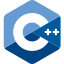
<br>

<div style="text-align:center; font-size:200%;">
 <b>Vector-Implementierung (V3)</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 10 Vector-Implementierung (V3).ipynb -->
<!-- slides/module_150_classes/topic_180_my_vector_v3.cpp -->


## `MyVector`-Class

Wir können jetzt die folgenden Verbesserungen vornehmen:

- Kapseln der Implementierung
- Mehrere Konstruktoren
- Automatische Freigabe des Heap-Speichers beim Zerstören des Objekts

Die Probleme beim Kopieren bleiben aber weiterhin bestehen.

In [ ]:
class MyVector
{
public:
    MyVector() = default;
    explicit MyVector(std::size_t size, int value = 0);
    MyVector(std::initializer_list<int> init);

    ~MyVector();

    void push_back(int value);
    int at(std::size_t index) const;
    std::size_t size() const;
    std::size_t capacity() const;
    void print() const;

private:
    std::size_t size_{0};
    std::size_t capacity_{0};
    int* data_{nullptr};
};


## `MyVector`-Implementierung


In [ ]:
MyVector::MyVector(std::size_t size, int value)
    : size_(size), capacity_(size), data_(new int[size_])
{
    for (std::size_t i = 0; i != size_; ++i) {
        data_[i] = value;
    }
    // Alternative:
    // std::fill_n(data_, size_, value);
}

In [ ]:
MyVector::MyVector(std::initializer_list<int> init)
    : size_(init.size()), capacity_(init.size()), data_(new int[size_])
{
    std::copy(init.begin(), init.end(), data_);
}

In [ ]:
#include <iostream>

In [ ]:
MyVector::~MyVector()
{
    delete[] data_;
    data_ = nullptr;
    size_ = 0;
    capacity_ = 0;
    std::cout << "Deleted MyVector\n";
}

In [ ]:
void MyVector::push_back(int value)
{
    if (size_ == capacity_) {
        std::size_t new_capacity = capacity_ == 0 ? 1 : capacity_ * 2;
        int* new_data = new int[new_capacity];
        for (std::size_t i = 0; i != size_; ++i) {
            new_data[i] = data_[i];
        }
        delete[] data_;
        data_ = new_data;
        capacity_ = new_capacity;
    }
    data_[size_] = value;
    ++size_;
}

In [ ]:
int MyVector::at(std::size_t index) const
{
    // The `at()` method should do bounds checking...
    return data_[index];
}

In [ ]:
std::size_t MyVector::size() const { return size_; }

In [ ]:
std::size_t MyVector::capacity() const { return capacity_; }

In [ ]:
#include <iostream>

In [ ]:
void MyVector::print() const
{
    std::cout << "[";
    for (std::size_t i = 0; i < size_; ++i) {
        std::cout << data_[i];
        if (i < size_ - 1) {
            std::cout << ", ";
        }
    }
    std::cout << "]";
}

In [ ]:
void print_info(const MyVector& vec)
{
    std::cout << "size: " << vec.size() << "\n";
    std::cout << "capacity: " << vec.capacity() << "\n";
    std::cout << "data: ";
    vec.print();
    std::cout << "\n";
}


## Verwenden von `MyVector`

- Die Verwendung von `MyVector` ist nun ähnlicher zu `std::vector`
- Wir müssen aber immer noch explizit `destroy()` aufrufen!

In [ ]:
{
    const MyVector vec{1, 2, 3};
    print_info(vec);
}

In [ ]:
{
    MyVector vec(4);
    vec.push_back(1);
    print_info(vec);
}

In [ ]:
const MyVector* vec{new MyVector(3, 4)};
print_info(*vec);

In [ ]:
delete vec;